### PROJECT: CUSTOMER'S CHURN ANALYSIS FOR POWERCO GAS AND ENERGY UTILITY COMPANY

In [61]:

## Importing our datasets including all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

client_data=pd.read_csv('client_data.csv')
price_data=pd.read_csv('price_data.csv')
client_data.head()


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [2]:
# Getting the number of rolls and columns in the client dataset
client_data.shape 

(14606, 26)

In [3]:
# Getting basic information about a dataset

client_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [4]:
# Checking for missing valuse
client_data.isnull().sum().any()

False

In [5]:
# Checking for duplicated values
client_data.duplicated().any()

False

In [6]:
# Getting stastical information about the client's given by POWERCO dataset
# From the describe method, I discovered that price sensitivity is affecred by churns.
# Maximum price leads to churns, which means one of the major factors that leads to churns is increase in prices for the utility products.

client_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [7]:
# Exploratory data analysis on price data

price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [8]:
# getting the number of rolls and columns on price dataset

price_data.shape

(193002, 8)

In [9]:
# checking for missing values on price datasets

price_data.isnull().sum().any()

False

In [10]:
# getting important information from the data and thier data type

price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [11]:
# getting some statical information on price dataset

price_data.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


## getting the number of Retentions=0 and Churns=1 in the the dataset

In [12]:
# Getting the number of Retentions=0 and Churns=1 in the the dataset.
# From the dataset, 13187 are likely to work with POWERCO while 1419 are likely to leave that is suffer from churns.

client_data['churn'].value_counts()


churn
0    13187
1     1419
Name: count, dtype: int64

In [13]:
# Percentage of retention and churn 

client_data['churn'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

churn
0    90.3%
1     9.7%
Name: proportion, dtype: object

In [14]:
# Value representaion for channel_sale for churn and retention

client_data.groupby(['channel_sales','churn']).size().unstack()

churn,0,1
channel_sales,,
MISSING,3442.0,283.0
epumfxlbckeskwekxbiuasklxalciiuu,3.0,NaN
ewpakwlliwisiwduibdlfmalxowmwpci,818.0,75.0
fixdbufsefwooaasfcxdxadsiekoceaa,2.0,NaN
foosdfpfkusacimwkcsosbicdxkicaua,5934.0,820.0
lmkebamcaaclubfxadlmueccxoimlema,1740.0,103.0
sddiedcslfslkckwlfkdpoeeailfpeds,11.0,NaN
usilxuppasemubllopkaafesmlibmsdf,1237.0,138.0


In [15]:
client_data['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

<Axes: xlabel='channel_sales'>

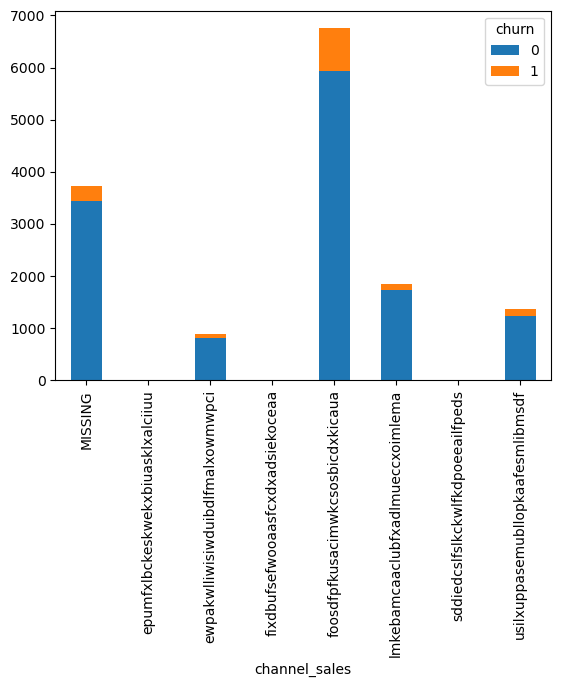

In [16]:
# The distribution of churns and retention across the various chanels
#  From the representaion,some sale channels are not important and needs to be close in order to prevent waste of resources.

client_data.groupby(['channel_sales','churn']).size().unstack().plot(kind='bar',stacked=True)

<Axes: ylabel='Frequency'>

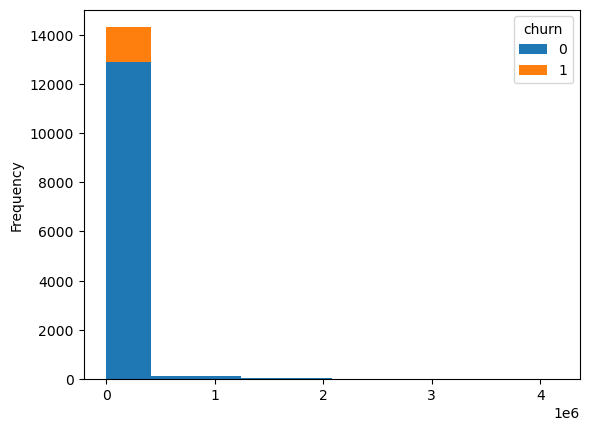

In [17]:
# The graphical representation of gas consumption for 12 months with respect to churns and retention

client_data.pivot(columns='churn').cons_gas_12m.plot(kind='hist',stacked=True)

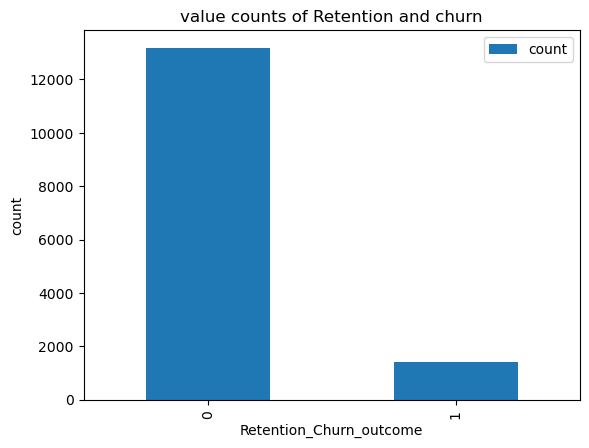

In [18]:
# Graph showing the count of retention and churn

client_data['churn'].value_counts().plot(kind='bar')
plt.xlabel('Retention_Churn_outcome')
plt.ylabel('count')
plt.title('value counts of Retention and churn')
plt.legend()
plt.show()



<Axes: ylabel='Frequency'>

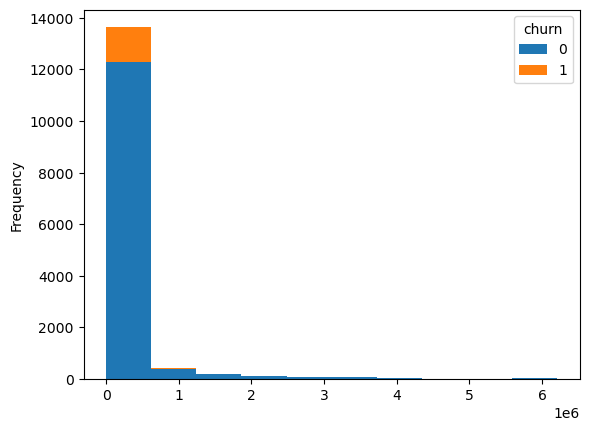

In [19]:
# The graphical representation of electricity consumption for 12 months with respect to churns and retention

client_data.pivot(columns='churn').cons_12m.plot(kind='hist',stacked=True)

<Axes: ylabel='Frequency'>

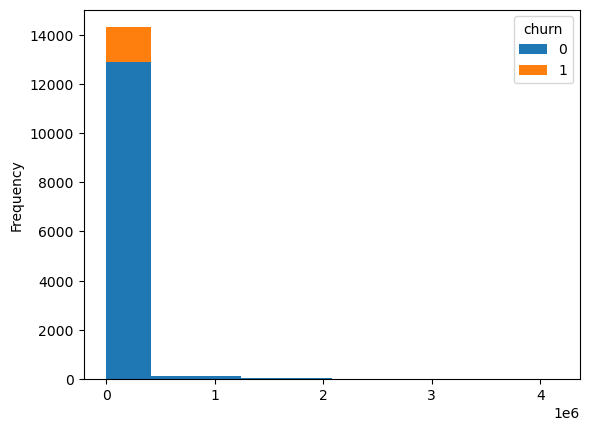

In [20]:
# The graphical representation of gas consumption for 12 months with respect to churns and retention

client_data.pivot(columns='churn').cons_gas_12m.plot(kind='hist',stacked=True)

<Axes: ylabel='Frequency'>

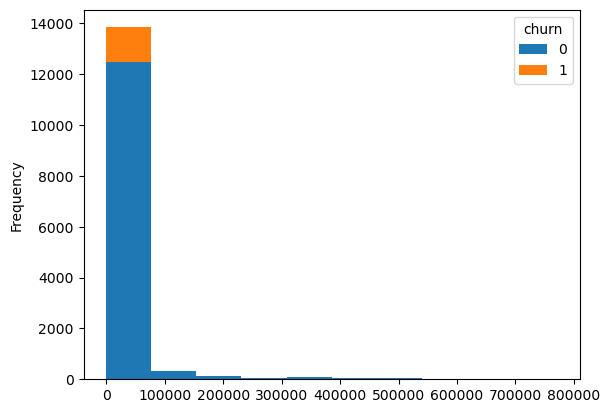

In [21]:
# The graphical representation of electricity consumption for last months with respect to churns and retention

client_data.pivot(columns='churn').cons_last_month.plot(kind='hist',stacked=True)

<Axes: ylabel='Frequency'>

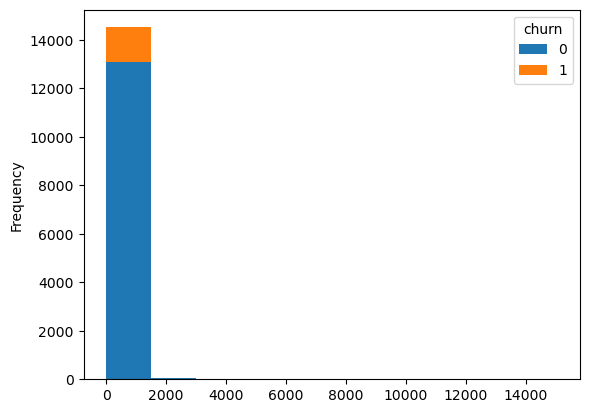

In [22]:
# The graphical representation of current paid consumption for both gas and electricity with respect to churns and retention

client_data.pivot(columns='churn').imp_cons.plot(kind='hist',stacked=True)

In [23]:
# from above it is seen that churn has some effects in both electricity and gass consumption

<Axes: ylabel='Frequency'>

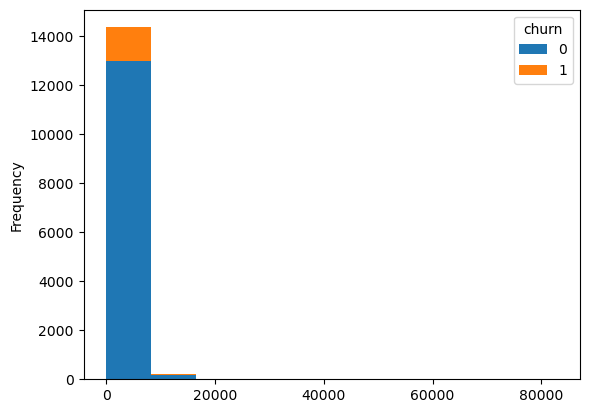

In [24]:
# the graphical representation of forcast electricity consumption for last months with respect to churns and retention

client_data.pivot(columns='churn').forecast_cons_12m.plot(kind='hist',stacked=True)

In [25]:
# importing our cleaned dataset 
from datetime import datetime
clean_data=pd.read_csv('clean_data.csv',parse_dates=['date_end','date_activ'])
clean_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,01/11/2015,23/06/2015,0.00,...,0.000131,4.100000e-05,9.084740e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,21/08/2009,31/08/2015,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,16/04/2010,17/04/2015,47.96,...,0.000004,9.450000e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450000e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,30/03/2010,31/03/2015,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,13/01/2010,09/03/2015,445.75,...,0.000011,2.900000e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.900000e-06,4.860000e-10,0


In [26]:
clean_data.dtypes

id                                        object
channel_sales                             object
cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                           object
date_renewal                              object
forecast_cons_12m                        float64
forecast_cons_year                         int64
forecast_discount_energy                   int64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                   object
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act         

In [27]:
clean_data['Actve_Day'] = clean_data['date_activ'].dt.day
clean_data['Active_Month'] = clean_data['date_activ'].dt.month
clean_data['Actve_Year'] = clean_data['date_activ'].dt.year
clean_data

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,Actve_Day,Active_Month,Actve_Year
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,01/11/2015,23/06/2015,0.00,...,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,15,6,2013
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,21/08/2009,31/08/2015,189.95,...,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,21,8,2009
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,16/04/2010,17/04/2015,47.96,...,0.000000,0.000000,0.000000,0.000004,9.450000e-08,0.000000e+00,0,16,4,2010
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,30/03/2010,31/03/2015,240.04,...,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,30,3,2010
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,13/01/2010,09/03/2015,445.75,...,0.000000,0.000000,0.000000,0.000011,2.900000e-06,4.860000e-10,0,13,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,08/05/2015,26/05/2014,4648.01,...,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,24,5,2012
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,27/08/2012,28/08/2015,631.69,...,0.014939,0.005682,0.000299,0.014948,5.684001e-03,2.987130e-04,1,27,8,2012
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,08/02/2012,09/02/2015,190.39,...,0.000000,0.000000,0.000000,0.000011,2.900000e-06,4.860000e-10,1,8,2,2012
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,30/08/2012,31/08/2015,19.34,...,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,30,8,2012


In [28]:
## From below, we can see that at maximum prices, the company will suffer from  churns since customers cannot afford to buy at max price
## And at minimum and average prices, the company will not suffer from churns.
## Churn likely to occure in the month of December in 2014


clean_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,Actve_Day,Active_Month,Actve_Year
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,1868.614880,1399.762906,0.966726,63.086871,0.137283,...,0.922810,1.460247,0.634413,0.922835,1.460280e+00,6.344275e-01,0.097152,13.954197,6.558880,2010.577502
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000,2003.000000
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,494.995000,0.000000,0.000000,16.180000,0.116340,...,0.000000,0.000000,0.000000,0.000004,0.000000e+00,0.000000e+00,0.000000,6.000000,3.000000,2010.000000
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,1112.875000,314.000000,0.000000,18.795000,0.143166,...,0.000000,0.000000,0.000000,0.000011,9.450000e-08,0.000000e+00,0.000000,13.000000,7.000000,2011.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2401.790000,1745.750000,0.000000,131.030000,0.146348,...,0.007962,0.000000,0.000000,0.007973,2.900000e-06,4.860000e-10,0.000000,21.000000,10.000000,2012.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,82902.830000,175375.000000,30.000000,599.310000,0.273963,...,525.988881,399.471115,80.876029,525.994268,3.994725e+02,8.087765e+01,1.000000,31.000000,12.000000,2014.000000
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,2387.571531,3247.786255,5.108289,66.165783,0.024623,...,18.218286,13.760009,5.895346,18.218452,1.376010e+01,5.895470e+00,0.296175,8.882374,3.514151,1.653268


In [29]:

# Using dummies varaible to convert our datatype from categorical to int

dummies = pd.get_dummies(clean_data.channel_sales,dtype='int')

In [30]:
dummies

,MISSING,epumfxlbckeskwekxbiuasklxalciiuu,ewpakwlliwisiwduibdlfmalxowmwpci,fixdbufsefwooaasfcxdxadsiekoceaa,foosdfpfkusacimwkcsosbicdxkicaua,lmkebamcaaclubfxadlmueccxoimlema,sddiedcslfslkckwlfkdpoeeailfpeds,usilxuppasemubllopkaafesmlibmsdf
0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
14601,0,0,0,0,1,0,0,0
14602,0,0,0,0,1,0,0,0
14603,0,0,0,0,1,0,0,0
14604,0,0,0,0,1,0,0,0


In [31]:
# Merging our clean data with the dumies variables 

merged= pd.concat([clean_data,dummies],axis=1)

In [32]:
# Checking the data type to see if we can do any conversions 

merged.dtypes

id                                          object
channel_sales                               object
cons_12m                                     int64
cons_gas_12m                                 int64
cons_last_month                              int64
date_activ                          datetime64[ns]
date_end                            datetime64[ns]
date_modif_prod                             object
date_renewal                                object
forecast_cons_12m                          float64
forecast_cons_year                           int64
forecast_discount_energy                     int64
forecast_meter_rent_12m                    float64
forecast_price_energy_off_peak             float64
forecast_price_energy_peak                 float64
forecast_price_pow_off_peak                float64
has_gas                                     object
imp_cons                                   float64
margin_gross_pow_ele                       float64
margin_net_pow_ele             

In [33]:
# Replacing the has gas column with o, 1 for the t,f varoables respectively

merged['has_gas'].replace({'t': 0, 'f':1} ,inplace=True)
merged

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,Active_Month,Actve_Year,MISSING,epumfxlbckeskwekxbiuasklxalciiuu,ewpakwlliwisiwduibdlfmalxowmwpci,fixdbufsefwooaasfcxdxadsiekoceaa,foosdfpfkusacimwkcsosbicdxkicaua,lmkebamcaaclubfxadlmueccxoimlema,sddiedcslfslkckwlfkdpoeeailfpeds,usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,01/11/2015,23/06/2015,0.00,...,6,2013,0,0,0,0,1,0,0,0
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,21/08/2009,31/08/2015,189.95,...,8,2009,1,0,0,0,0,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,16/04/2010,17/04/2015,47.96,...,4,2010,0,0,0,0,1,0,0,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,30/03/2010,31/03/2015,240.04,...,3,2010,0,0,0,0,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,13/01/2010,09/03/2015,445.75,...,1,2010,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,08/05/2015,26/05/2014,4648.01,...,5,2012,0,0,0,0,1,0,0,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,27/08/2012,28/08/2015,631.69,...,8,2012,0,0,0,0,1,0,0,0
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,08/02/2012,09/02/2015,190.39,...,2,2012,0,0,0,0,1,0,0,0
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,30/08/2012,31/08/2015,19.34,...,8,2012,0,0,0,0,1,0,0,0


In [34]:
 merged['date_end']=pd.to_datetime(merged['date_end'])

In [35]:
merged['date_activ']=pd.to_datetime(merged['date_activ'])

In [36]:
merged.dtypes

id                                          object
channel_sales                               object
cons_12m                                     int64
cons_gas_12m                                 int64
cons_last_month                              int64
date_activ                          datetime64[ns]
date_end                            datetime64[ns]
date_modif_prod                             object
date_renewal                                object
forecast_cons_12m                          float64
forecast_cons_year                           int64
forecast_discount_energy                     int64
forecast_meter_rent_12m                    float64
forecast_price_energy_off_peak             float64
forecast_price_energy_peak                 float64
forecast_price_pow_off_peak                float64
has_gas                                      int64
imp_cons                                   float64
margin_gross_pow_ele                       float64
margin_net_pow_ele             

In [37]:
merged['tenue_days'] = round((merged['date_end'] - merged['date_activ'])/np.timedelta64(1,'D'),0)
merged.head()


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,Actve_Year,MISSING,epumfxlbckeskwekxbiuasklxalciiuu,ewpakwlliwisiwduibdlfmalxowmwpci,fixdbufsefwooaasfcxdxadsiekoceaa,foosdfpfkusacimwkcsosbicdxkicaua,lmkebamcaaclubfxadlmueccxoimlema,sddiedcslfslkckwlfkdpoeeailfpeds,usilxuppasemubllopkaafesmlibmsdf,tenue_days
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,01/11/2015,23/06/2015,0.00,...,2013,0,0,0,0,1,0,0,0,1096.0
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,21/08/2009,31/08/2015,189.95,...,2009,1,0,0,0,0,0,0,0,2566.0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,16/04/2010,17/04/2015,47.96,...,2010,0,0,0,0,1,0,0,0,2192.0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,30/03/2010,31/03/2015,240.04,...,2010,0,0,0,0,0,1,0,0,2192.0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,13/01/2010,09/03/2015,445.75,...,2010,1,0,0,0,0,0,0,0,2245.0


In [38]:
merged.groupby('tenue_days')['churn'].mean()

tenue_days
731.0     0.000000
941.0     0.000000
979.0     1.000000
980.0     0.000000
989.0     0.000000
            ...   
4573.0    0.000000
4579.0    0.000000
4631.0    0.000000
4749.0    0.097561
4795.0    0.000000
Name: churn, Length: 1410, dtype: float64

In [39]:

# Splitting and training our model

X = merged.drop(columns=['id','channel_sales','date_activ','date_end',
'date_modif_prod','date_renewal','origin_up','epumfxlbckeskwekxbiuasklxalciiuu','churn'],axis=1)

In [40]:
X.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,Active_Month,Actve_Year,MISSING,ewpakwlliwisiwduibdlfmalxowmwpci,fixdbufsefwooaasfcxdxadsiekoceaa,foosdfpfkusacimwkcsosbicdxkicaua,lmkebamcaaclubfxadlmueccxoimlema,sddiedcslfslkckwlfkdpoeeailfpeds,usilxuppasemubllopkaafesmlibmsdf,tenue_days
0,0,54946,0,0.00,0,0,1.78,0.114481,0.098142,40.606701,...,6,2013,0,0,0,1,0,0,0,1096.0
1,4660,0,0,189.95,0,0,16.27,0.145711,0.000000,44.311378,...,8,2009,1,0,0,0,0,0,0,2566.0
2,544,0,0,47.96,0,0,38.72,0.165794,0.087899,44.311378,...,4,2010,0,0,0,1,0,0,0,2192.0
3,1584,0,0,240.04,0,0,19.83,0.146694,0.000000,44.311378,...,3,2010,0,0,0,0,1,0,0,2192.0
4,4425,0,526,445.75,526,0,131.73,0.116900,0.100015,40.606701,...,1,2010,1,0,0,0,0,0,0,2245.0


In [41]:
X.dtypes

cons_12m                              int64
cons_gas_12m                          int64
cons_last_month                       int64
forecast_cons_12m                   float64
forecast_cons_year                    int64
forecast_discount_energy              int64
forecast_meter_rent_12m             float64
forecast_price_energy_off_peak      float64
forecast_price_energy_peak          float64
forecast_price_pow_off_peak         float64
has_gas                               int64
imp_cons                            float64
margin_gross_pow_ele                float64
margin_net_pow_ele                  float64
nb_prod_act                           int64
net_margin                          float64
num_years_antig                       int64
pow_max                             float64
var_year_price_off_peak_var         float64
var_year_price_peak_var             float64
var_year_price_mid_peak_var         float64
var_year_price_off_peak_fix         float64
var_year_price_peak_fix         

In [42]:
X.shape

(14606, 47)

In [43]:
y = merged['churn']
y

0        1
1        0
2        0
3        0
4        0
        ..
14601    0
14602    1
14603    1
14604    0
14605    0
Name: churn, Length: 14606, dtype: int64

In [44]:
y.shape

(14606,)

In [45]:
y.dtypes

dtype('int64')

In [46]:
# Training our model

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=33)

<Axes: >

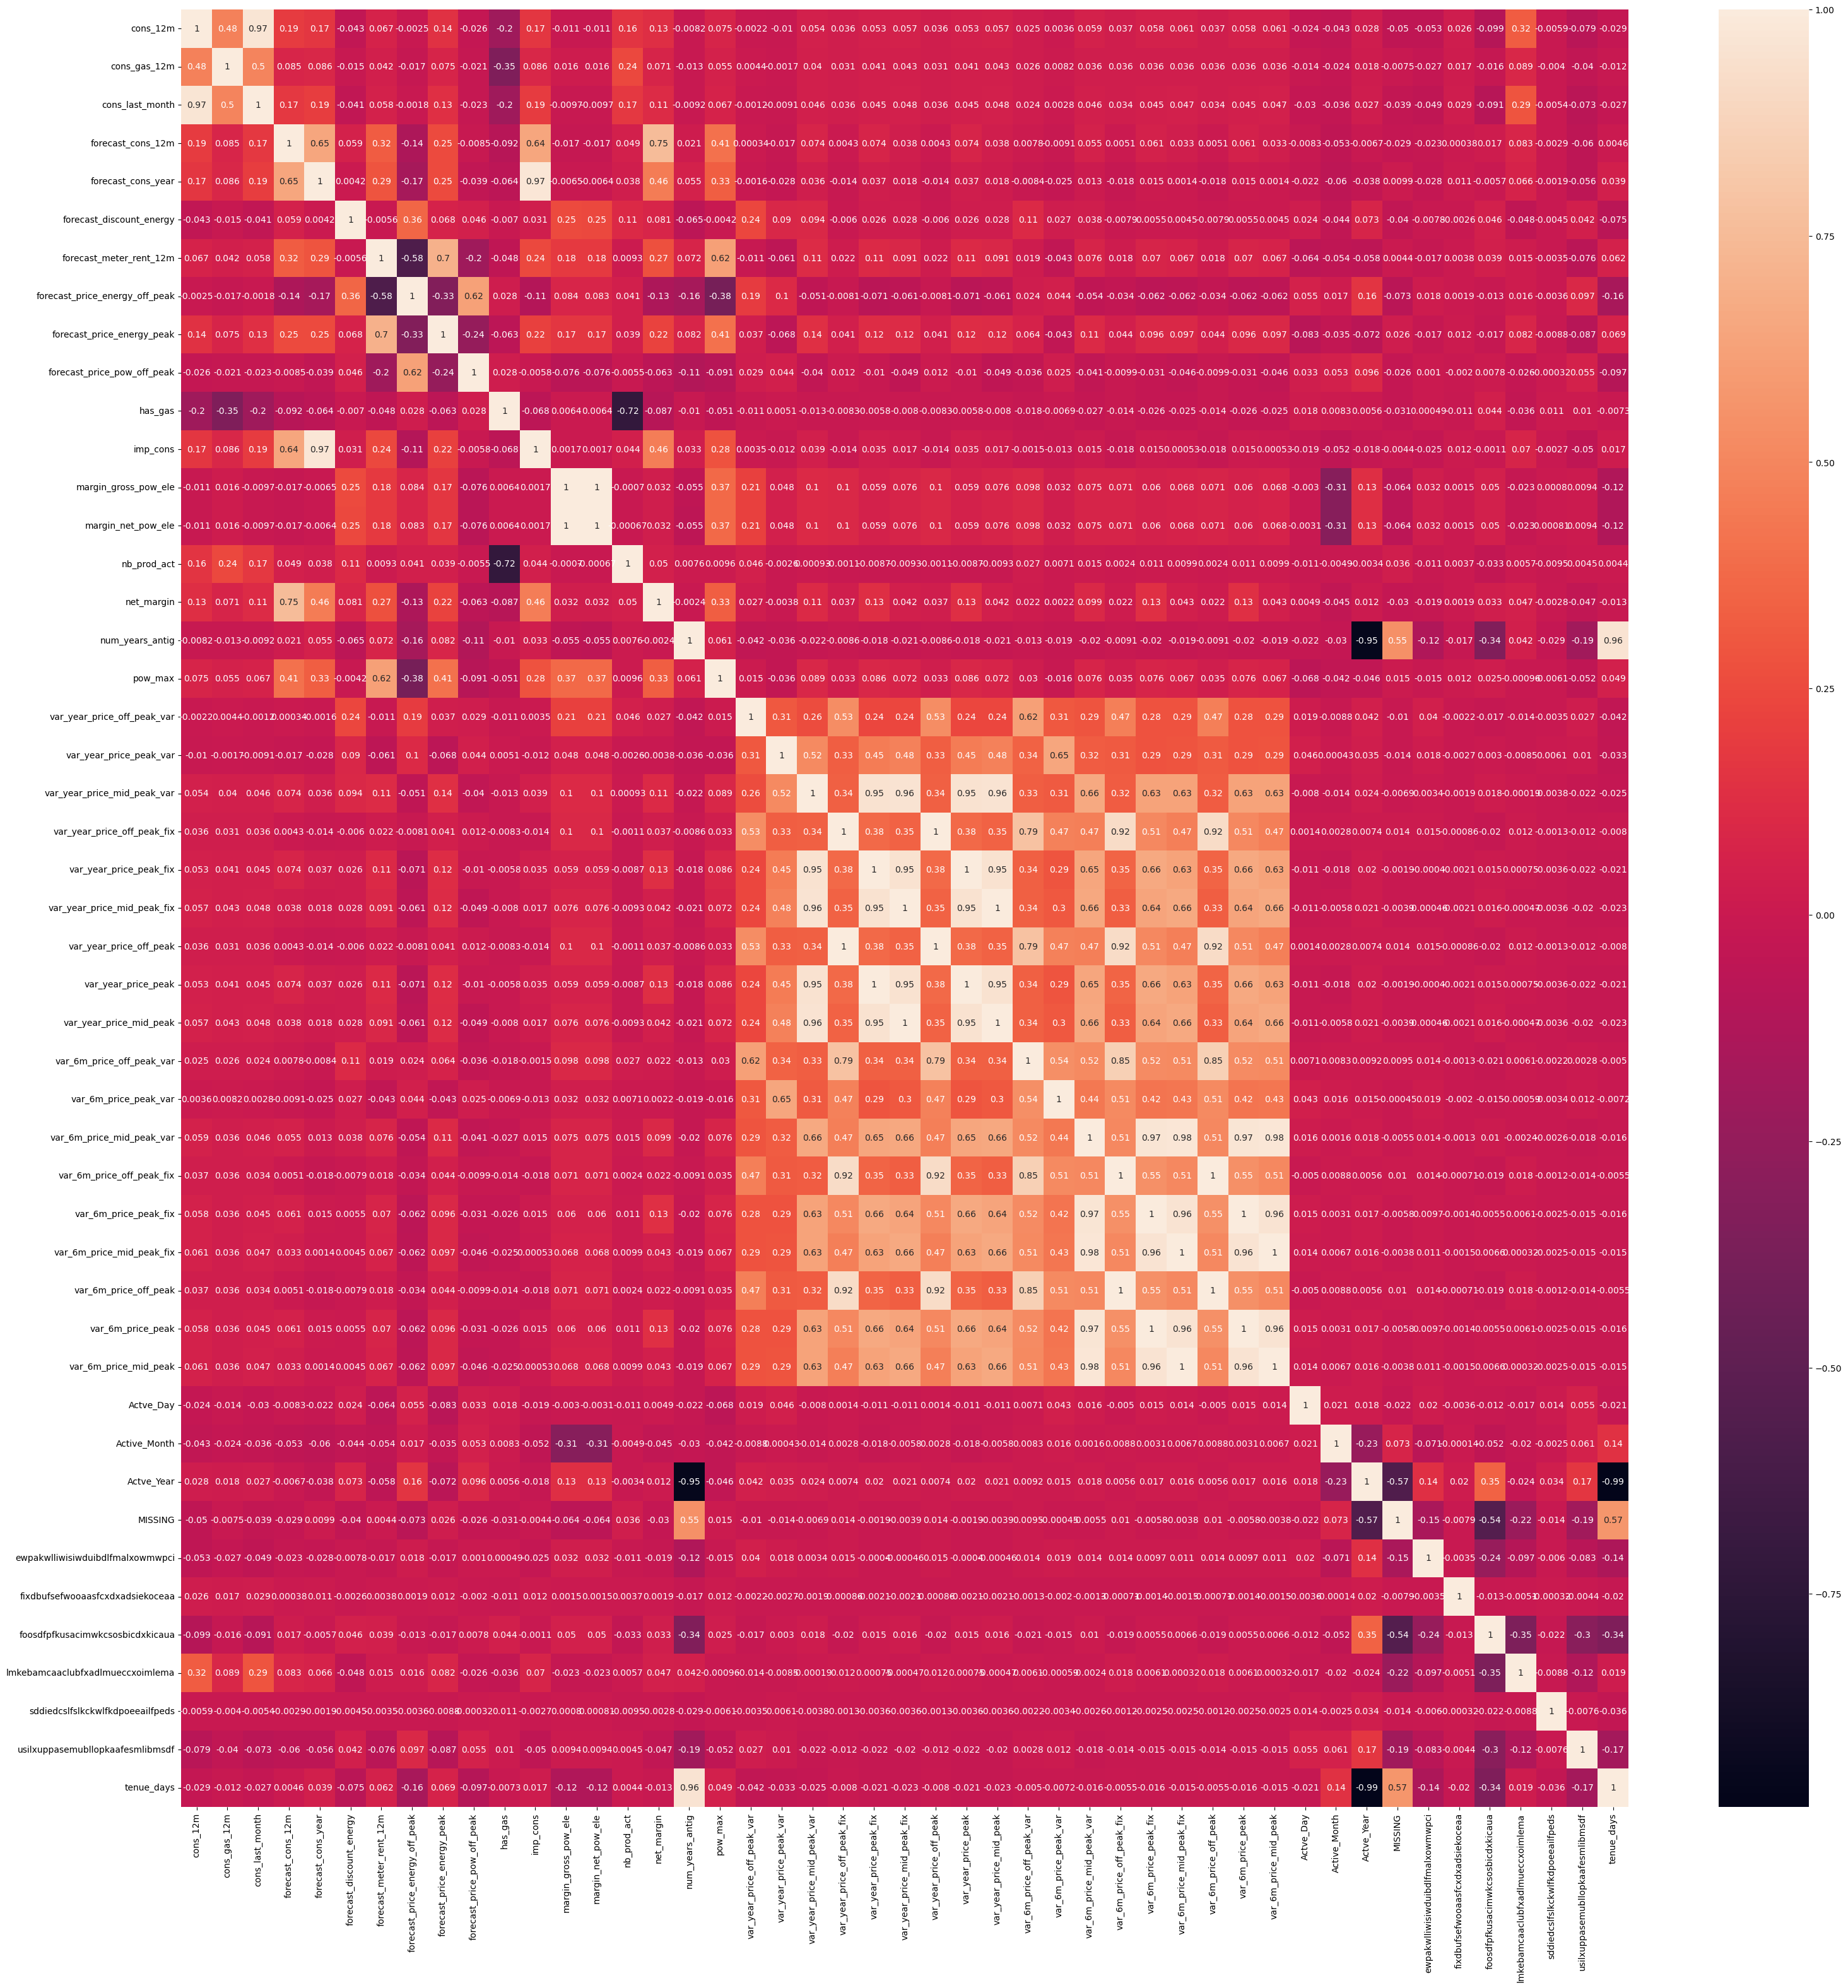

In [47]:
# Features enginnering
# Checking our features and dropping the featues with 90% accuracy using heatmap

plt.figure(figsize=(37,37))
corr=X_train.corr()
sns.heatmap(corr,annot=True)


In [48]:
corr=X_train.corr()
corr

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,Active_Month,Actve_Year,MISSING,ewpakwlliwisiwduibdlfmalxowmwpci,fixdbufsefwooaasfcxdxadsiekoceaa,foosdfpfkusacimwkcsosbicdxkicaua,lmkebamcaaclubfxadlmueccxoimlema,sddiedcslfslkckwlfkdpoeeailfpeds,usilxuppasemubllopkaafesmlibmsdf,tenue_days
cons_12m,1.000000,0.479175,0.967040,0.192965,0.170120,-0.043119,0.066643,-0.002537,0.144177,-0.026329,...,-0.042692,0.028045,-0.050070,-0.052905,0.025971,-0.098615,0.323807,-0.005863,-0.079214,-0.028653
cons_gas_12m,0.479175,1.000000,0.495203,0.084597,0.086155,-0.015495,0.041646,-0.017090,0.074606,-0.021155,...,-0.024387,0.018420,-0.007454,-0.026873,0.017218,-0.016343,0.089121,-0.003969,-0.039715,-0.012334
cons_last_month,0.967040,0.495203,1.000000,0.173241,0.194066,-0.040799,0.058429,-0.001824,0.134005,-0.023096,...,-0.035743,0.027211,-0.038812,-0.048902,0.029285,-0.090894,0.288763,-0.005358,-0.073167,-0.027224
forecast_cons_12m,0.192965,0.084597,0.173241,1.000000,0.649913,0.059212,0.318005,-0.137802,0.251681,-0.008518,...,-0.052620,-0.006731,-0.029433,-0.022758,0.000375,0.017237,0.082694,-0.002904,-0.059568,0.004571
forecast_cons_year,0.170120,0.086155,0.194066,0.649913,1.000000,0.004207,0.290106,-0.169057,0.249470,-0.039396,...,-0.059578,-0.038158,0.009850,-0.028198,0.010730,-0.005683,0.066072,-0.001859,-0.056498,0.038867
forecast_discount_energy,-0.043119,-0.015495,-0.040799,0.059212,0.004207,1.000000,-0.005626,0.357430,0.067589,0.046462,...,-0.044481,0.072876,-0.039729,-0.007765,-0.002582,0.046210,-0.048048,-0.004473,0.041639,-0.075478
forecast_meter_rent_12m,0.066643,0.041646,0.058429,0.318005,0.290106,-0.005626,1.000000,-0.581242,0.702244,-0.197344,...,-0.053818,-0.057592,0.004433,-0.016966,0.003781,0.038802,0.015466,-0.003528,-0.076423,0.061572
forecast_price_energy_off_peak,-0.002537,-0.017090,-0.001824,-0.137802,-0.169057,0.357430,-0.581242,1.000000,-0.329900,0.620282,...,0.016551,0.155479,-0.072804,0.018203,0.001927,-0.012608,0.016444,-0.003566,0.097035,-0.161784
forecast_price_energy_peak,0.144177,0.074606,0.134005,0.251681,0.249470,0.067589,0.702244,-0.329900,1.000000,-0.241753,...,-0.034949,-0.071844,0.025547,-0.016872,0.011964,-0.017053,0.081682,-0.008831,-0.087360,0.068543
forecast_price_pow_off_peak,-0.026329,-0.021155,-0.023096,-0.008518,-0.039396,0.046462,-0.197344,0.620282,-0.241753,1.000000,...,0.053417,0.096374,-0.026476,0.001039,-0.002045,0.007776,-0.025569,-0.000318,0.054532,-0.097273


In [49]:
## Here, I am looking for correlated features which I  consider to be duplicates values and droping them which might slow my model performance.
##  Featues that are correlated to 90% are dropped

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [50]:
## 16 features are correlated with each other.

corr_features = correlation(X_train, 0.9)
len(set(corr_features))

16

In [51]:
corr_features

{'Actve_Year',
 'cons_last_month',
 'imp_cons',
 'margin_net_pow_ele',
 'tenue_days',
 'var_6m_price_mid_peak',
 'var_6m_price_mid_peak_fix',
 'var_6m_price_off_peak',
 'var_6m_price_off_peak_fix',
 'var_6m_price_peak',
 'var_6m_price_peak_fix',
 'var_year_price_mid_peak',
 'var_year_price_mid_peak_fix',
 'var_year_price_off_peak',
 'var_year_price_peak',
 'var_year_price_peak_fix'}

In [52]:
## Dropping correlated features
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,var_6m_price_mid_peak_var,Actve_Day,Active_Month,MISSING,ewpakwlliwisiwduibdlfmalxowmwpci,fixdbufsefwooaasfcxdxadsiekoceaa,foosdfpfkusacimwkcsosbicdxkicaua,lmkebamcaaclubfxadlmueccxoimlema,sddiedcslfslkckwlfkdpoeeailfpeds,usilxuppasemubllopkaafesmlibmsdf
10157,12581,0,848.58,571,0,0.00,0.114603,0.098261,40.606701,1,...,6.030000e-07,4,9,0,0,0,1,0,0,0
9417,26074,4440,2496.39,1881,0,129.71,0.116340,0.099998,40.606701,0,...,4.860000e-10,8,6,0,0,0,1,0,0,0
13802,798393,0,994.45,0,0,17.78,0.164635,0.086741,44.311378,1,...,0.000000e+00,4,4,0,0,0,0,1,0,0
9156,5168,339,777.30,0,0,6.84,0.143460,0.000000,45.806878,0,...,0.000000e+00,5,12,0,0,0,0,0,0,1
7560,12562,0,1122.95,1389,0,131.76,0.116910,0.100572,40.606701,1,...,4.860000e-10,13,4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608,29971,4934,4353.61,0,0,17.17,0.141434,0.000000,44.311378,0,...,0.000000e+00,4,9,0,0,0,1,0,0,0
2161,5947,0,638.49,591,0,130.66,0.120372,0.103487,40.606701,1,...,4.860000e-10,7,6,0,0,0,1,0,0,0
1344,661,0,99.52,0,0,0.00,0.146694,0.000000,44.311378,1,...,0.000000e+00,11,1,1,0,0,0,0,0,0
5147,12020,0,1344.73,2501,0,15.96,0.164637,0.087381,44.311378,1,...,0.000000e+00,15,6,0,0,0,1,0,0,0


In [53]:
# Inertialising our model using randaom forest classifier

model=RandomForestClassifier()

In [54]:
## An accuracy of 91% was recorded in our model building.

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9129244249726177

In [55]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [56]:
y_test[:10]

10157    0
9417     0
13802    0
9156     0
7560     0
6218     0
6198     0
2277     0
2765     0
13508    0
Name: churn, dtype: int64

In [57]:
# Evaluating our model with some important metrices

confusion_matrix(y_test,y_pred)

array([[3317,    1],
       [ 317,   17]], dtype=int64)

In [58]:
## Further evaluation of our model using classification report
## The precision an recall score  are quite significant.

classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.91      1.00      0.95      3318\n           1       0.94      0.05      0.10       334\n\n    accuracy                           0.91      3652\n   macro avg       0.93      0.53      0.53      3652\nweighted avg       0.92      0.91      0.88      3652\n'

True positives: 3315
False positives: 317
True negatives: 17
False negatives: 3

Accuracy: 0.9123767798466593
Precision: 0.91
Recall: 0.88
F1-score:o.91

In [59]:
## Model understanding
## Identifying important featues in our model that can influence churns.

feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


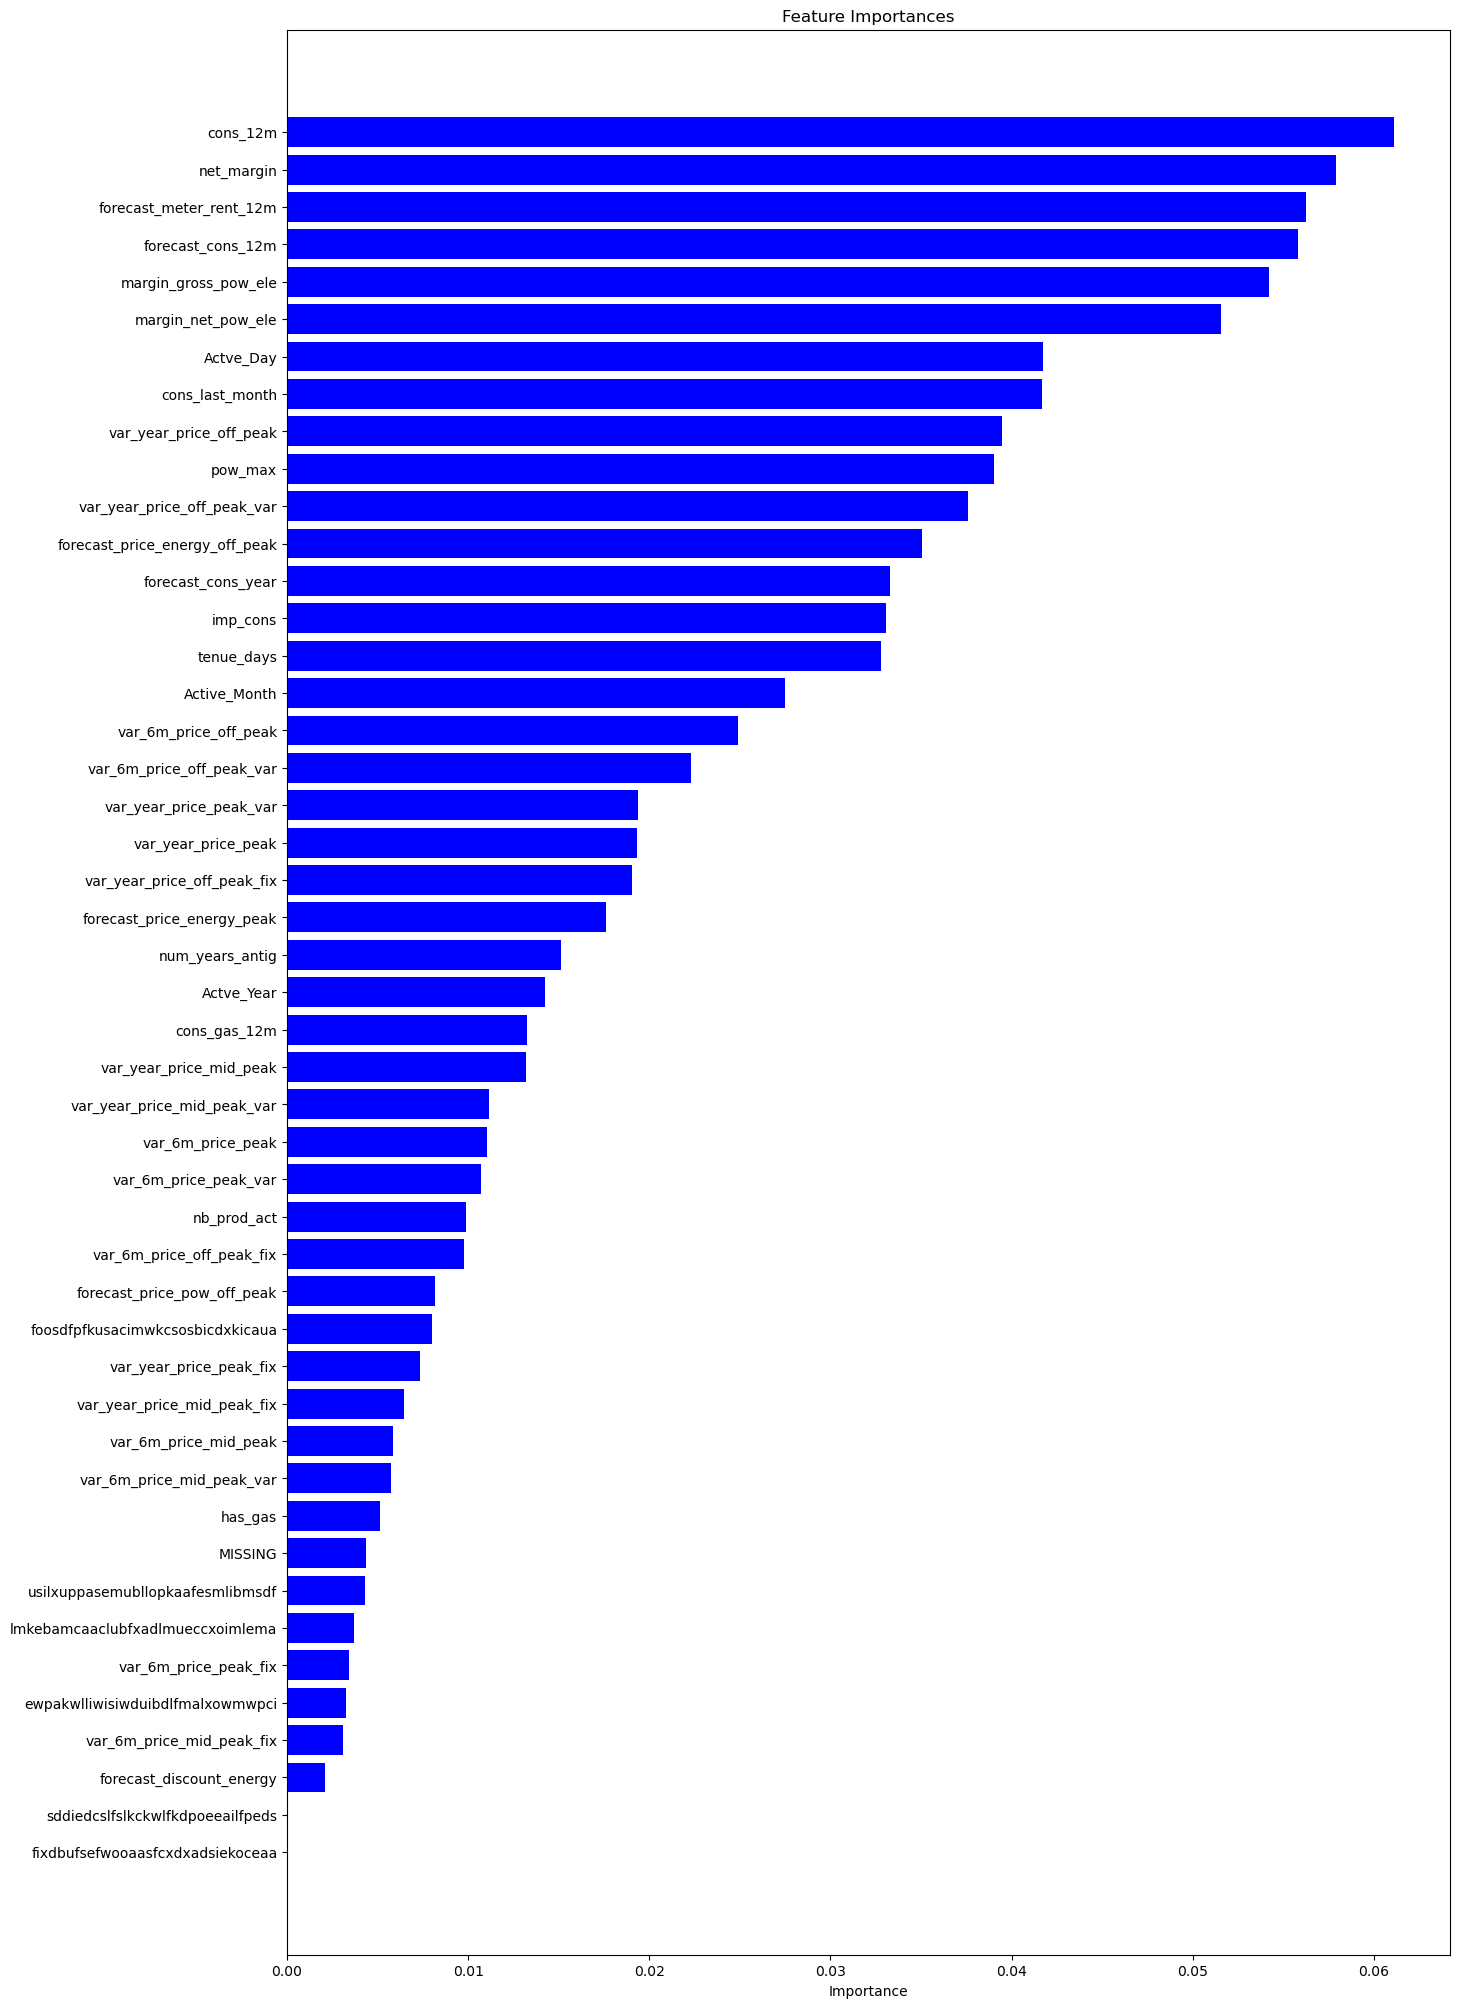

In [60]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

## A simple way of understanding the results of a model is to look at feature importances.
## Feature importances indicate the importance of a feature within the predictive model, there are several ways to calculate feature importance,


From this chart, we can observe the following points:

- Net margin and consumption over 12 months is a top driver for churn in this model
- Margin on power subscription also is an influential driver
- Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract
- The feature that our colleague recommended is in the top half in terms of how influential it is and some of the features built off the back of this actually outperform it
- Our price sensitivity features are scattered around but are not the main driver for a customer churning
